In [3]:
from __future__ import print_function  # adds compatability to python 2
# always add this at the beginning

import numpy as np
import pandas as pd

In [4]:
# install xlrd to interact with excel csv files
# !pip install xlrd

In [93]:
df_can = pd.read_excel(
    'datasets_Canada.xlsx',
    sheet_name= "Canada by Citizenship",
    skiprows = range(20),
    skip_footer=2)

In [94]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [95]:
# change the column name to Country from OdName
df_can = df_can.rename(columns={'OdName':'Country'})

In [96]:
# change the index to be Country
df_can = df_can.set_index('Country')

In [97]:
# add a new column "Total" by summing over the column axis
df_can['Total'] = df_can.sum(axis=1, skipna=True)

In [98]:
df_can.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,2749


In [99]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year `2013`, one might confuse that when the `2013th` positional index.

To avoid this ambuigity, let's convert the column names into strings: `'1980'` to `'2013'`.

In [100]:
df_can.columns = list(map(str, df_can.columns))
#[print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [101]:
years = list(map(str,range(1980,2013))) # emits the last year
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012']

In [102]:
print('Matplotlib Version: ', mpl.__version__)

Matplotlib Version:  3.1.3


In [103]:
# apply a style to matplotlib
print(plt.style.available)
mpl.style.use(['ggplot'])

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [104]:
# take the results for Haiti and create a new dataframe from it
haiti = df_can.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

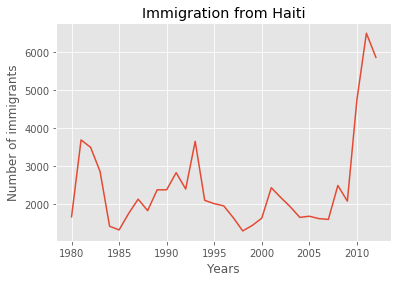

In [105]:
# let's change the index values of Haiti to type integer for plotting
haiti.index = haiti.index.map(int) 
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` method.

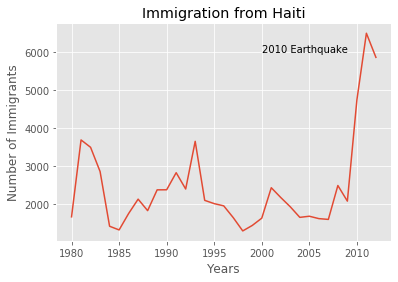

In [106]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show()

Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value `y = 6000`.

`plt.text(2000, 6000, '2010 Earthquake')` # years stored as type int

If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the `20th year` with a base year of 1980.

`plt.text(20, 6000, '2010 Earthquake')` # years stored as type int

In [107]:
df = df_can.loc[['India','China'],years]
df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024


#### plots in pandas works on clolumns. But here it is in rows. So we have to transpose it fitst.

In [108]:
df = df.transpose()

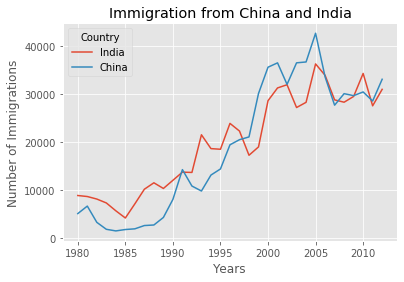

In [109]:
df.index = df.index.map(int)
df.plot(kind='line')
plt.title('Immigration from China and India')
plt.ylabel('Number of Immigrations')
plt.xlabel('Years')
plt.show()

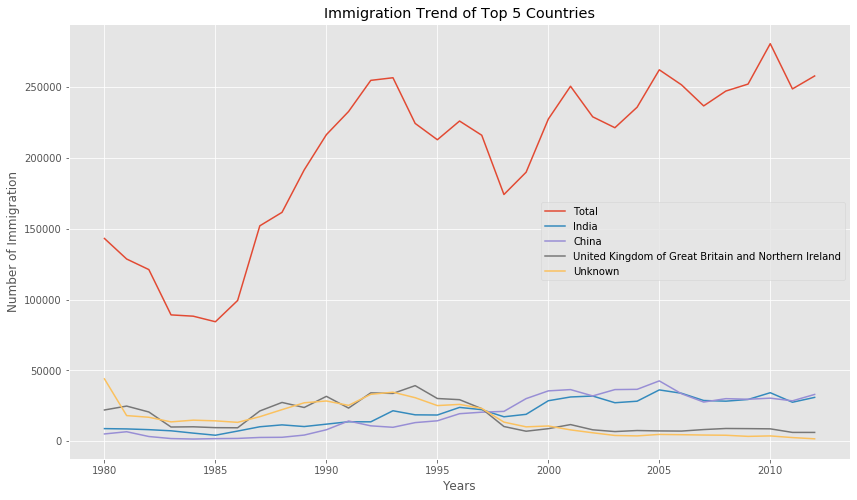

In [110]:
### type your answer here
df_can.index.name = None
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()
 
# print(df_top5)
 
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14,8))
 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigration')
plt.xlabel('Years')
plt.show()

In [89]:
df_top5

Country,Total,India,China,Philippines,United Kingdom of Great Britain and Northern Ireland
1980,143137,8880,5123,6051,22045
1981,128641,8670,6682,5921,24796
1982,121175,8147,3308,5249,20620
1983,89185,7338,1863,4562,10015
1984,88272,5704,1527,3801,10170
1985,84346,4211,1816,3150,9564
1986,99351,7150,1960,4166,9470
1987,152075,10189,2643,7360,21337
1988,161585,11522,2758,8639,27359
1989,191550,10343,4323,11865,23795
